In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Analysis of stackoverflow_survey_2021

In [4]:
df = pd.read_csv(r'/home/hp/Desktop/stack_overflow/stack-overflow-developer-survey-2021/survey_results_public_2021.csv')
df.head(10)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
6,7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,...,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
7,8,I am a student who is learning to code,"Student, full-time",Malaysia,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School;Online Courses or Certification,4,...,18-24 years old,Woman,No,Straight / Heterosexual,White or of European descent;Multiracial;South...,None of the above,None of the above,Appropriate in length,Easy,NaN
8,9,I am a developer by profession,Employed part-time,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp,6,...,25-34 years old,Man,No,NaN,South Asian,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,NaN
9,10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0


In [5]:
#drop unnecessary columns
drop_cols = ['Age1stCode','CompFreq', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites',
             'OrgSize', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 
             'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith'
             ,'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', 'Sexuality', 'SurveyEase', 
             'SurveyLength', 'Trans', 'YearsCode']
df.drop(drop_cols, axis=1, inplace=True)

In [6]:
#Selecting only the required columns for analysis
cols =['Age','Gender', 'Country', 'DevType', 'EdLevel','Currency', 'CompTotal', 'Employment', 
       'Ethnicity', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'MainBranch','MentalHealth', 'YearsCodePro']
df_2021 = df[cols]
#df_2021.head()
#df_2021.dtypes

In [7]:
#changing the name of columns for easier understanding
#'MainBranch': 'Profession'
#'CompTotal': 'SalaryUSD'

df_2021.rename(columns={'MainBranch': 'Profession', 'CompTotal': 'SalaryUSD'},inplace =True)


/tmp/ipykernel_39208/3423935300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.rename(columns={'MainBranch': 'Profession', 'CompTotal': 'SalaryUSD'},inplace =True)


In [8]:
print(df_2021.isnull().sum())

Age                        1032
Gender                     1153
Country                       0
DevType                   16955
EdLevel                     313
Currency                  22359
SalaryUSD                 36256
Employment                  116
Ethnicity                  3975
LanguageHaveWorkedWith     1082
LanguageWantToWorkWith     6618
Profession                    0
MentalHealth               6519
YearsCodePro              22223
dtype: int64


## Data Validation - Total Cells vs Missing %

In [10]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df_2021.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  1168146
Total missing values:  348081
Missing:  29.797730763106667 %


## Gender

In [11]:
df_2021['Gender'].isnull().sum()

1153

In [12]:
#Counting number of each gender
print(df_2021['Gender'].value_counts())

Gender
Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming              

In [13]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
df_2021['Gender'] = df['Gender'].fillna('Non-binary') 

#Grouping genders into 3 groups Man, Womanand Non-binary
df_2021['Gender'].replace('Man;Or, in your own words', 'Man', inplace =True)
df_2021['Gender'].replace('Man;Or, in your own words:', inplace =True)
df_2021['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming', 'Man', inplace =True)
df_2021['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words', 'Man', inplace =True)
df_2021['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Man', inplace =True)
df_2021['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman', inplace =True)
df_2021['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Woman', inplace =True)
df_2021['Gender'].replace('Woman;Or, in your own words:', 'Woman', inplace =True)
df_2021['Gender'].replace('Man;Woman', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Man;Woman;Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Man;Woman;Or, in your own words:', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Prefer not to say', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Or, in your own words:', 'Non-binary', inplace =True)
df_2021['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)

/tmp/ipykernel_39208/3527603516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Gender'] = df['Gender'].fillna('Non-binary')
/tmp/ipykernel_39208/3527603516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Gender'].replace('Man;Or, in your own words', 'Man', inplace =True)
/tmp/ipykernel_39208/3527603516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [14]:
#Counting number of each gender after
df_2021.groupby('Gender')['Gender'].count()

Gender
Man           75314
Non-binary     3812
Woman          4313
Name: Gender, dtype: int64

In [15]:
print('df shape after clean Gender: ', df_2021.shape)

df shape after clean Gender:  (83439, 14)


## Age

In [17]:
df_2021['Age'].isnull().sum()

1032

Text(0.5, 0, 'Approx Age')

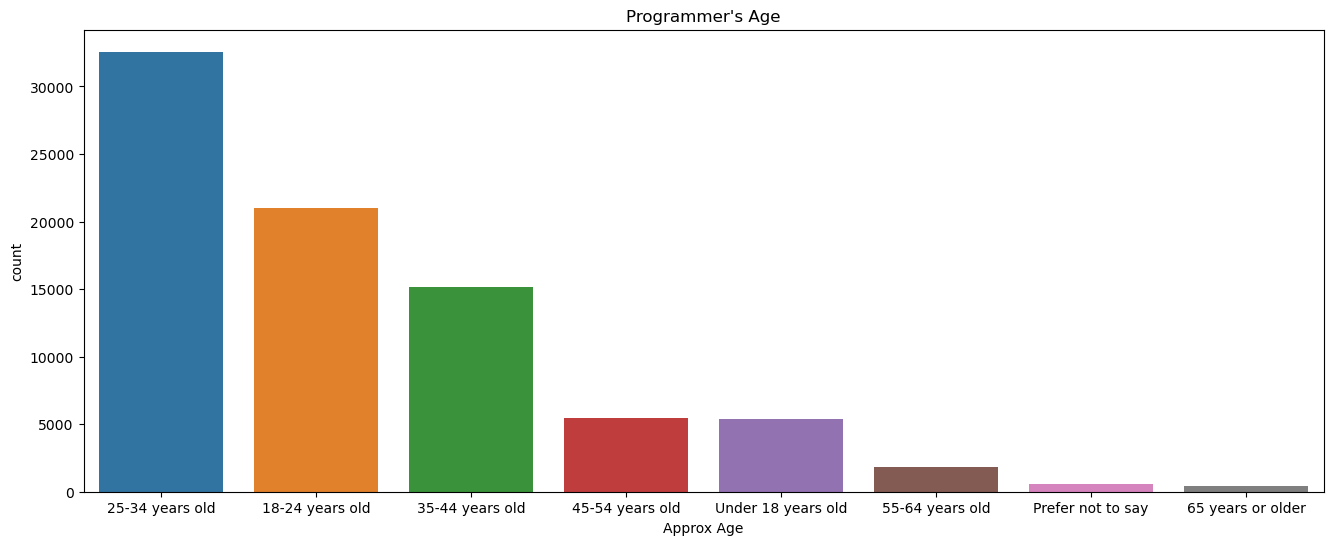

In [18]:
plt.figure(figsize=(16,6))
plt.title("Programmer's Age")
sns.countplot(x = "Age", data = df_2021, order = df_2021['Age'].value_counts().index[ : ], ).set_xlabel("Approx Age")

## EdLevel

In [19]:
df_2021['EdLevel'].isnull().sum()

313

In [20]:
df_2021['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: count, dtype: int64

In [21]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df_2021 = refactor_ed(df_2021)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df_2021['EdLevel'].replace('nan', 'Bachelors', inplace=True)

/tmp/ipykernel_39208/585663171.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
/tmp/ipykernel_39208/585663171.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['EdLevel'].replace('nan', 'Bachelors', inplace=True)


In [22]:
df_2021['EdLevel'].value_counts()

EdLevel
Bachelors       37271
No Degree       22602
Masters         17512
Doctorate        2567
Associate        2231
Professional     1256
Name: count, dtype: int64

## DevType

In [23]:
df_2021['DevType'].isnull().sum()

16955

In [24]:
df_2021['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                             8601
Developer, back-end                                               5467
Developer, front-end                                              2402
Developer, front-end;Developer, full-stack;Developer, back-end    2141
Developer, full-stack;Developer, back-end                         1774
Developer, mobile                                                 1744
Other (please specify):                                           1704
Developer, front-end;Developer, full-stack                        1003
Developer, desktop or enterprise applications                      870
Student                                                            798
Name: count, dtype: int64

In [25]:
df_2021['DevType'] = df_2021['DevType'].bfill().ffill()

/tmp/ipykernel_39208/3143970236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['DevType'] = df_2021['DevType'].bfill().ffill()


In [26]:
df_2021['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                             10806
Developer, back-end                                                6869
Developer, front-end                                               3036
Developer, front-end;Developer, full-stack;Developer, back-end     2660
Developer, full-stack;Developer, back-end                          2250
Other (please specify):                                            2213
Developer, mobile                                                  2180
Developer, front-end;Developer, full-stack                         1265
Developer, desktop or enterprise applications                      1086
Student                                                            1014
Name: count, dtype: int64

In [27]:
df_2021['DevType'].isnull().sum()

0

In [28]:
df_2021[df_2021['DevType'].isnull()]

,Age,Gender,Country,DevType,EdLevel,Currency,SalaryUSD,Employment,Ethnicity,LanguageHaveWorkedWith,LanguageWantToWorkWith,Profession,MentalHealth,YearsCodePro


## Ethnicity

In [29]:
df_2021['Ethnicity'].isnull().sum()

3975

In [30]:
#count number of each Ethnicity
df_2021.groupby('Ethnicity')['Ethnicity'].count()
df_2021['Ethnicity'].value_counts().nlargest(10)

Ethnicity
White or of European descent    42671
South Asian                      8328
Hispanic or Latino/a/x           3585
Southeast Asian                  3224
Prefer not to say                3062
Middle Eastern                   2985
East Asian                       2947
I don't know                     2140
Black or of African descent      2085
Or, in your own words:           2014
Name: count, dtype: int64

In [31]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df_2021.loc[df['Ethnicity'].str.match('Biracial') == True, 'Ethnicity'] = 'Biracial'
df_2021.loc[df['Ethnicity'].str.match('Black or of African descent') == True, 'Ethnicity'] = 'Black or of African descent'
df_2021.loc[df['Ethnicity'].str.match('East Asian') == True, 'Ethnicity'] = 'East Asian'
df_2021.loc[df['Ethnicity'].str.match('Hispanic or Latino') == True, 'Ethnicity'] = 'Hispanic or Latino'
df_2021.loc[df['Ethnicity'].str.match('Indigenous') == True, 'Ethnicity'] = 'Indigenous'
df_2021.loc[df['Ethnicity'].str.match('Middle Eastern') == True, 'Ethnicity'] = 'Middle Eastern'
df_2021.loc[df['Ethnicity'].str.match('South Asian') == True, 'Ethnicity'] = 'South Asian'
df_2021.loc[df['Ethnicity'].str.match('White or of European descent') == True, 'Ethnicity'] = 'White or of European descent'
df_2021.loc[df['Ethnicity'].str.match('Multiracial') == True, 'Ethnicity'] = 'Multiracial'

In [32]:
df_2021.groupby('Ethnicity')['Ethnicity'].count() #11 groups of Ethnicity after combining 
df_2021['Ethnicity'].value_counts()

Ethnicity
White or of European descent                                                         46434
South Asian                                                                           8637
Hispanic or Latino                                                                    3789
Southeast Asian                                                                       3224
Middle Eastern                                                                        3151
                                                                                     ...  
I don't know;Multiracial;South Asian                                                     1
Southeast Asian;Middle Eastern;Or, in your own words:;Black or of African descent        1
I don't know;Southeast Asian;East Asian;Or, in your own words:                           1
I don't know;Southeast Asian;South Asian;East Asian;Or, in your own words:               1
Southeast Asian;Hispanic or Latino/a/x;East Asian;Biracial                      

In [33]:
df_2021['Ethnicity']=df_2021.groupby(['Country'])['Ethnicity'].bfill().ffill()

/tmp/ipykernel_39208/2357935597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Ethnicity']=df_2021.groupby(['Country'])['Ethnicity'].bfill().ffill()


In [34]:
#count number of each Ethnicity
df_2021.groupby('Ethnicity')['Ethnicity'].count()
df_2021['Ethnicity'].value_counts()

Ethnicity
White or of European descent                                                         48188
South Asian                                                                           9464
Hispanic or Latino                                                                    3865
Southeast Asian                                                                       3421
Middle Eastern                                                                        3311
                                                                                     ...  
I don't know;Multiracial;South Asian                                                     1
Southeast Asian;Middle Eastern;Or, in your own words:;Black or of African descent        1
I don't know;Southeast Asian;East Asian;Or, in your own words:                           1
I don't know;Southeast Asian;South Asian;East Asian;Or, in your own words:               1
Southeast Asian;Hispanic or Latino/a/x;East Asian;Biracial                      

In [35]:
df_2021['Ethnicity'].isnull().sum()

0

## LanguageWantToWorkWith

In [36]:
df_2021['LanguageWantToWorkWith'].isnull().sum()

6618

In [37]:
df_2021['LanguageWantToWorkWith'].value_counts().nlargest(10)

LanguageWantToWorkWith
Python                                    1389
Rust                                       821
HTML/CSS;JavaScript;Node.js;TypeScript     812
C#                                         700
Java                                       512
Go                                         497
C++;Python                                 392
Kotlin                                     371
Swift                                      365
Python;SQL                                 342
Name: count, dtype: int64

In [38]:
df_2021['LanguageWantToWorkWith']=df_2021['LanguageWantToWorkWith'].bfill().ffill()

/tmp/ipykernel_39208/3813594346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['LanguageWantToWorkWith']=df_2021['LanguageWantToWorkWith'].bfill().ffill()


In [39]:
df_2021['LanguageWantToWorkWith'].value_counts().nlargest(10)

LanguageWantToWorkWith
Python                                    1520
Rust                                       891
HTML/CSS;JavaScript;Node.js;TypeScript     880
C#                                         766
Java                                       552
Go                                         541
C++;Python                                 422
Kotlin                                     395
Swift                                      391
Python;SQL                                 371
Name: count, dtype: int64

## LanguageHaveWorkedWith

In [40]:
df_2021['LanguageHaveWorkedWith'].isnull().sum()

1082

In [41]:
df_2021['LanguageHaveWorkedWith'].value_counts().nlargest(10)

LanguageHaveWorkedWith
Python                                    1337
HTML/CSS;JavaScript;Node.js;TypeScript     811
Java                                       715
HTML/CSS;JavaScript;PHP;SQL                674
C#                                         597
C#;HTML/CSS;JavaScript;SQL                 558
HTML/CSS;JavaScript                        531
HTML/CSS;JavaScript;Node.js                494
HTML/CSS;JavaScript;TypeScript             491
HTML/CSS;JavaScript;Python                 432
Name: count, dtype: int64

In [42]:
df_2021['LanguageHaveWorkedWith']=df_2021['LanguageHaveWorkedWith'].bfill().ffill()

/tmp/ipykernel_39208/3371025579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['LanguageHaveWorkedWith']=df_2021['LanguageHaveWorkedWith'].bfill().ffill()


In [43]:
df_2021['LanguageHaveWorkedWith'].isnull().sum()

0

## MainBranch (Profession)

In [44]:
df_2021['Profession'].isnull().sum()

0

In [45]:
df_2021.groupby('Profession')['Profession'].count()


Profession
I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: Profession, dtype: int64

In [46]:
df_2021.dropna(subset=['Profession'], inplace = True)

/tmp/ipykernel_39208/2811998518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(subset=['Profession'], inplace = True)


In [47]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)          
    return df

df_2021 = refactor_prof(df_2021)

/tmp/ipykernel_39208/1594265416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)


In [48]:
df_2021['Profession'].value_counts()

Profession
Developer        58153
Student          12029
Non developer     6578
Novoice           4929
Ex-Developer      1237
nan                513
Name: count, dtype: int64

## Country

In [49]:
df_2021.groupby('Country')['Country'].count()

Country
Afghanistan                              65
Albania                                  73
Algeria                                  46
Andorra                                  12
Angola                                   27
                                       ... 
Venezuela, Bolivarian Republic of...    104
Viet Nam                                386
Yemen                                    20
Zambia                                   22
Zimbabwe                                 36
Name: Country, Length: 181, dtype: int64

## CompTotal (SalaryUSD)

In [50]:
df_2021['SalaryUSD'].isnull().sum()

36256

In [51]:
df_2021['SalaryUSD'].value_counts().nlargest()

SalaryUSD
100000.0    1127
50000.0      918
120000.0     892
60000.0      871
80000.0      845
Name: count, dtype: int64

In [52]:
mean_salary = df_2021.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age                 EdLevel    Country                                             
25-34 years old     No Degree  Canada                                                  1.265823e+72
18-24 years old     Bachelors  India                                                   7.774538e+49
65 years or older   Bachelors  United States of America                                2.121212e+38
25-34 years old     Masters    United States of America                                1.303781e+26
                    Bachelors  Netherlands                                             2.724750e+13
18-24 years old     Bachelors  United Kingdom of Great Britain and Northern Ireland    2.167722e+13
Under 18 years old  No Degree  Malaysia                                                2.737288e+10
55-64 years old     No Degree  Belgium                                                 5.123468e+09
Prefer not to say   Bachelors  Netherlands                                             5.000003e+09
45-54 years old 

In [53]:
#df2020['SalaryUSD'] = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

means = df_2021.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform('mean')
df_2021['SalaryUSD'] = df_2021['SalaryUSD'].fillna(means)

/tmp/ipykernel_39208/541491545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['SalaryUSD'] = df_2021['SalaryUSD'].fillna(means)


In [54]:
mean_salary = df_2021.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age                 EdLevel    Country                                             
25-34 years old     No Degree  Canada                                                  1.265823e+72
18-24 years old     Bachelors  India                                                   7.774538e+49
65 years or older   Bachelors  United States of America                                2.121212e+38
25-34 years old     Masters    United States of America                                1.303781e+26
                    Bachelors  Netherlands                                             2.724750e+13
18-24 years old     Bachelors  United Kingdom of Great Britain and Northern Ireland    2.167722e+13
Under 18 years old  No Degree  Malaysia                                                2.737288e+10
55-64 years old     No Degree  Belgium                                                 5.123468e+09
Prefer not to say   Bachelors  Netherlands                                             5.000003e+09
45-54 years old 

In [55]:
df_2021['SalaryUSD'].value_counts().nlargest()

SalaryUSD
7.774538e+49    1999
1.000000e+05    1194
1.254325e+06    1191
2.514045e+05    1101
1.826832e+04     971
Name: count, dtype: int64

In [56]:
from decimal import Decimal

# Assuming df2021 is already defined and read from a CSV
# If not, read the CSV file first
# df2021 = pd.read_csv('your_file.csv')

# Fill NaN values in 'SalaryUSD' column with 0
df_2021['SalaryUSD'].fillna(0, inplace=True)

# Convert the 'SalaryUSD' column to integers using Decimal for precision
df_2021['SalaryUSD'] = df_2021['SalaryUSD'].apply(lambda x: int(Decimal(x)))

# Display modified 'SalaryUSD' column
print("\n'SalaryUSD' column after conversion to integers:")
print(df_2021['SalaryUSD'].head(-10
                              ))

/tmp/ipykernel_39208/1391507961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['SalaryUSD'].fillna(0, inplace=True)



'SalaryUSD' column after conversion to integers:
0          4800
1         13527
2        188730
3         51037
4         62988
          ...  
83424    120000
83425      1500
83426    152756
83427     86000
83428     15000
Name: SalaryUSD, Length: 83429, dtype: object


/tmp/ipykernel_39208/1391507961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['SalaryUSD'] = df_2021['SalaryUSD'].apply(lambda x: int(Decimal(x)))


In [57]:
df_2021.dropna(subset=['SalaryUSD'], inplace = True)

/tmp/ipykernel_39208/2314557933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(subset=['SalaryUSD'], inplace = True)


In [58]:
df_2021['SalaryUSD'].isnull().sum()

0

## Cleaned Dataset:2021_Survey

In [59]:
print(df_2021.isnull().sum())

Age                        1032
Gender                        0
Country                       0
DevType                       0
EdLevel                       0
Currency                  22359
SalaryUSD                     0
Employment                  116
Ethnicity                     0
LanguageHaveWorkedWith        0
LanguageWantToWorkWith        0
Profession                    0
MentalHealth               6519
YearsCodePro              22223
dtype: int64


In [60]:
df_2021.dropna(subset=['MentalHealth'], inplace = True)
df_2021.dropna(subset=['YearsCodePro'], inplace = True)
df_2021.dropna(subset=['Currency'], inplace = True)
df_2021.dropna(subset=['Age'], inplace = True)
df_2021.dropna(subset=['Employment'], inplace = True)

/tmp/ipykernel_39208/4279514726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(subset=['MentalHealth'], inplace = True)
/tmp/ipykernel_39208/4279514726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(subset=['YearsCodePro'], inplace = True)
/tmp/ipykernel_39208/4279514726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.dropna(subset=['Currency'], inplace = True)
/tmp/ipykernel_39208/42

In [61]:
#resetting the index values
df_2021 = df_2021.reset_index(drop=True)

In [62]:
df_2021.head(5)

,Age,Gender,Country,DevType,EdLevel,Currency,SalaryUSD,Employment,Ethnicity,LanguageHaveWorkedWith,LanguageWantToWorkWith,Profession,MentalHealth,YearsCodePro
0,25-34 years old,Man,India,"Developer, front-end",Bachelors,INR\tIndian rupee,1254324,Employed part-time,South Asian,HTML/CSS;JavaScript,HTML/CSS;JavaScript,Developer,I have a concentration and/or memory disorder ...,4
1,25-34 years old,Man,Sweden,Data scientist or machine learning specialist,Masters,SEK\tSwedish krona,42000,Employed full-time,White or of European descent,C++;Python,Haskell;Python,Developer,None of the above,4
2,25-34 years old,Man,United Kingdom of Great Britain and Northern I...,"Developer, back-end",Bachelors,GBP\tPound sterling,61029,Employed full-time,White or of European descent,C#;TypeScript,C#,Developer,None of the above,10
3,25-34 years old,Man,Spain,"Developer, back-end",Bachelors,EUR European Euro,43000,Employed full-time,White or of European descent,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,C++;Clojure;JavaScript;Node.js;Rust;SQL;TypeSc...,Developer,None of the above,5
4,25-34 years old,Man,Germany,"Developer, desktop or enterprise applications;...",Masters,EUR European Euro,71500,Employed full-time,White or of European descent,C;C++;Java;Perl;Ruby,Rust,Developer,Prefer not to say,6


In [63]:
df_2021.info()#after cleaning the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55518 entries, 0 to 55517
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     55518 non-null  object
 1   Gender                  55518 non-null  object
 2   Country                 55518 non-null  object
 3   DevType                 55518 non-null  object
 4   EdLevel                 55518 non-null  object
 5   Currency                55518 non-null  object
 6   SalaryUSD               55518 non-null  object
 7   Employment              55518 non-null  object
 8   Ethnicity               55518 non-null  object
 9   LanguageHaveWorkedWith  55518 non-null  object
 10  LanguageWantToWorkWith  55518 non-null  object
 11  Profession              55518 non-null  object
 12  MentalHealth            55518 non-null  object
 13  YearsCodePro            55518 non-null  object
dtypes: object(14)
memory usage: 5.9+ MB


### After Cleaning Dataset 2021

In [64]:
#Find % of missing data
missing_count = df_2021.isnull().sum() #number of missing
total_cells = np.product(df_2021.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  777252
Total missing :  0
Missing Percentage:  0.0 %


# Visualization
After cleaning the datasets, we started visualizations to analyze the datase

## To find whether there is any difference between men and women's income from latest stack overflow survey (2021)

In [65]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,10)

/tmp/ipykernel_39208/3434910232.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [66]:
#sns.boxplot('SalaryUSD', data=df2020, width=0.3) 
#Cleaning SalaryUSD's outliers
df_2021 = df_2021[(df_2021['SalaryUSD'] < 200000)]

Text(0.5, 1.0, 'Income vs Gender')

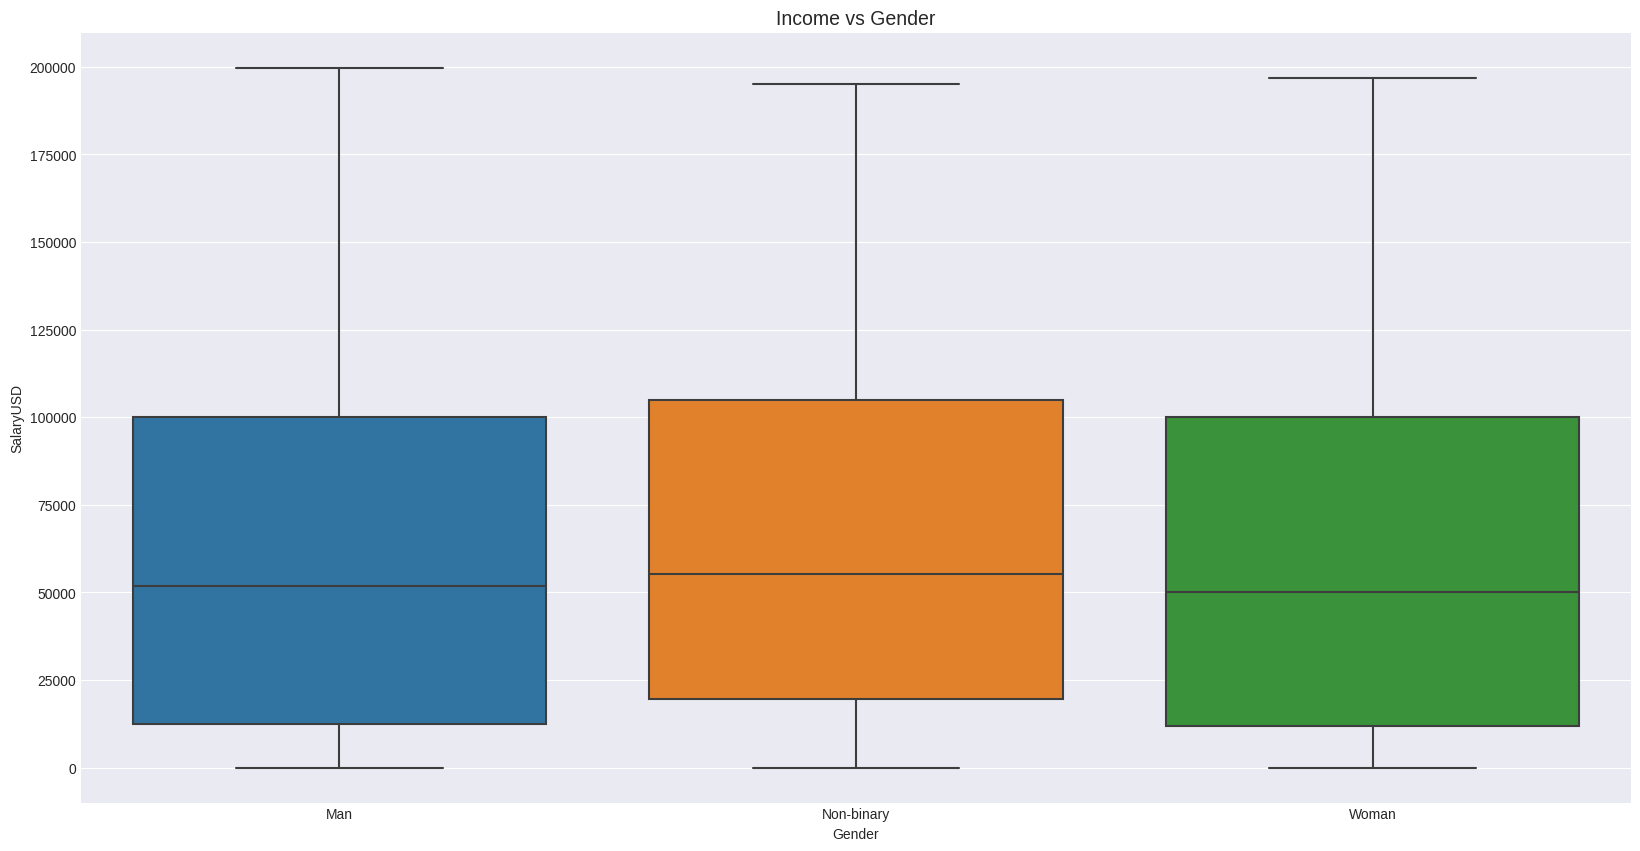

In [67]:
sns.boxplot(x ='Gender', y='SalaryUSD', data=df_2021)
plt.title('Income vs Gender', fontsize = 14)

In [ ]:
### **Analysis**<br>
There is a little bit of difference between Gender and income they received respectively. Men tend to receive more salary than women from the above analysis.